<a href="https://colab.research.google.com/github/Faziox/non/blob/master/Grupa2_Szeregi_czasowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [208]:
import pandas as pd
from fbprophet import Prophet

In [209]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [210]:
downloaded = drive.CreateFile({'id':'1KXNm0ulji3bBtaGirdHE7zhiTDMzcywm'}) # replace the id with id of file you want to access
downloaded.GetContentFile('all_metrics_integrated.csv')

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

In [211]:
import pandas as pd
df = pd.read_csv('all_metrics_integrated.csv') 
df.head()

,AdUnit_Code,Days,Day of week,TOP_Pricing_code,Pricing_PLN,Pricing_level,TOP_Inventory_size,Estimated revenue (PLN),Est_rev_7days,top_markets_share_7days,PL_share_7days,Top_adv_share_7days,AWSB_share_7days,Ad request eCPM (PLN),AreCPM_mean_7days,Ad eCPM (PLN),Matched eCPM (PLN),Ad impressions,Clicks,Coverage,Coverage_mean_7days,Ad requests,Ad request CTR,CTR,Matched requests,Ad CTR,CPC (PLN)
0,0,2019-09-09,0,63,NaN,NaN,468x60,0.46,NaN,NaN,NaN,NaN,NaN,0.09,NaN,1.76,1.75,260.0,1.0,5.01,NaN,5208.0,0.02,0.38,261.0,0.38,0.46
1,0,2019-09-10,1,63,NaN,NaN,300x250,0.40,0.46,0.311111,0.022222,0.075000,0.425000,0.24,0.0900,1.44,1.43,277.0,0.0,16.95,5.010,1646.0,0.00,0.00,279.0,0.00,0.00
2,0,2019-09-11,2,7,1.0,10.0,468x60,0.58,0.86,0.268293,0.036585,0.150685,0.465753,0.33,0.1650,2.03,2.01,286.0,2.0,16.38,10.980,1764.0,0.11,0.69,289.0,0.70,0.29
3,0,2019-09-12,3,7,1.0,10.0,300x250,0.54,1.44,0.287770,0.021583,0.166667,0.420635,0.35,0.2200,2.47,2.44,220.0,0.0,14.36,12.780,1553.0,0.00,0.00,223.0,0.00,0.00
4,0,2019-09-13,4,7,1.0,10.0,300x250,0.41,1.98,0.264249,0.020725,0.161850,0.439306,0.34,0.2525,2.52,2.52,161.0,0.0,13.59,13.175,1185.0,0.00,0.00,161.0,0.00,0.00


In [224]:
df.columns.tolist()

['AdUnit_Code',
 'Days',
 'Day of week',
 'TOP_Pricing_code',
 'Pricing_PLN',
 'Pricing_level',
 'TOP_Inventory_size',
 'Estimated revenue (PLN)',
 'Est_rev_7days',
 'top_markets_share_7days',
 'PL_share_7days',
 'Top_adv_share_7days',
 'AWSB_share_7days',
 'Ad request eCPM (PLN)',
 'AreCPM_mean_7days',
 'Ad eCPM (PLN)',
 'Matched eCPM (PLN)',
 'Ad impressions',
 'Clicks',
 'Coverage',
 'Coverage_mean_7days',
 'Ad requests',
 'Ad request CTR',
 'CTR',
 'Matched requests',
 'Ad CTR',
 'CPC (PLN)']

In [225]:
df2 = df[['Days','Ad eCPM (PLN)']]
df3 = df[['Days','Estimated revenue (PLN)']]
print(df2 , df3)


             Days  Ad eCPM (PLN)
0      2019-09-09           1.76
1      2019-09-10           1.44
2      2019-09-11           2.03
3      2019-09-12           2.47
4      2019-09-13           2.52
...           ...            ...
25737  2019-10-24           1.50
25738  2019-10-25           1.28
25739  2019-10-26           1.33
25740  2019-10-27           1.00
25741  2019-10-28           1.03

[25742 rows x 2 columns]              Days  Estimated revenue (PLN)
0      2019-09-09                     0.46
1      2019-09-10                     0.40
2      2019-09-11                     0.58
3      2019-09-12                     0.54
4      2019-09-13                     0.41
...           ...                      ...
25737  2019-10-24                     9.67
25738  2019-10-25                     9.04
25739  2019-10-26                     6.81
25740  2019-10-27                     4.93
25741  2019-10-28                     8.17

[25742 rows x 2 columns]


In [226]:
mapping = {df2.columns[0]: "ds", df2.columns[1]: "y"} # Czyścimy nazwy kolumn
df2 = df2.rename(columns=mapping)

mapping = {df3.columns[0]: "ds", df3.columns[1]: "y"} # Czyścimy nazwy kolumn
df3 = df3.rename(columns=mapping)


In [227]:
df2 = df2.astype({'ds':str, 'y': float}) # Ustalamy typ danych 
df2['ds'] = pd.to_datetime(df2['ds'], format='%Y-%m-%d', errors='ignore') # Zmieniamy string na datę
df2.drop(df2.tail(1).index,inplace=True) # Wyrzucamy ostatni pusty wiersz
print(df2.head())
print(df2.tail())

df3 = df3.astype({'ds':str, 'y': float}) # Ustalamy typ danych 
df3['ds'] = pd.to_datetime(df3['ds'], format='%Y-%m-%d', errors='ignore') # Zmieniamy string na datę
df3.drop(df3.tail(1).index,inplace=True) # Wyrzucamy ostatni pusty wiersz
print(df3.head())
print(df3.tail())

          ds     y
0 2019-09-09  1.76
1 2019-09-10  1.44
2 2019-09-11  2.03
3 2019-09-12  2.47
4 2019-09-13  2.52
              ds     y
25736 2019-10-23  1.21
25737 2019-10-24  1.50
25738 2019-10-25  1.28
25739 2019-10-26  1.33
25740 2019-10-27  1.00
          ds     y
0 2019-09-09  0.46
1 2019-09-10  0.40
2 2019-09-11  0.58
3 2019-09-12  0.54
4 2019-09-13  0.41
              ds     y
25736 2019-10-23  8.04
25737 2019-10-24  9.67
25738 2019-10-25  9.04
25739 2019-10-26  6.81
25740 2019-10-27  4.93


In [228]:
m = Prophet()
m.fit(df2)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [229]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
26101,2020-10-23
26102,2020-10-24
26103,2020-10-25
26104,2020-10-26
26105,2020-10-27


In [230]:
forecast = m.predict(future)
forecast.head()
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
26101,2020-10-23,0.629756,-104.927850,105.391087
26102,2020-10-24,0.666410,-105.319993,105.214582
26103,2020-10-25,0.549747,-104.752856,107.283175
26104,2020-10-26,0.423903,-106.580028,108.175381
26105,2020-10-27,0.530058,-107.039909,107.786450


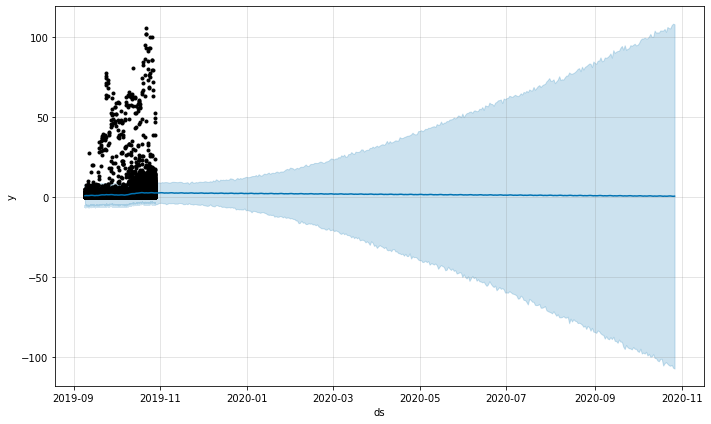

In [231]:
fig1 = m.plot(forecast)

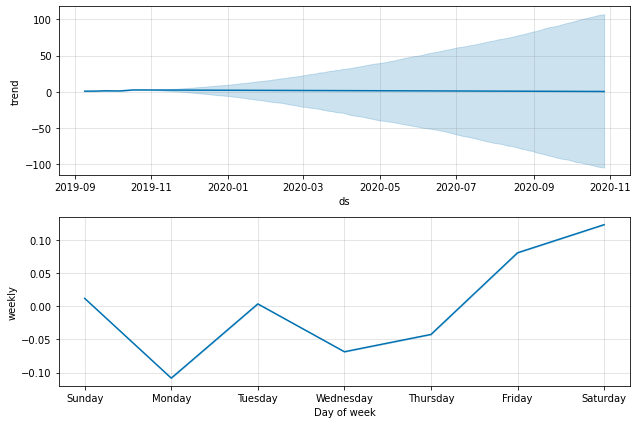

In [232]:
fig2 = m.plot_components(forecast)

In [233]:
m = Prophet()
m.fit(df3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [234]:
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.head()
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
26101,2020-10-23,-16.392886,-162.001857,132.759228
26102,2020-10-24,-16.935819,-168.716644,136.430628
26103,2020-10-25,-16.328196,-170.555913,139.546662
26104,2020-10-26,-16.031532,-170.856713,141.923572
26105,2020-10-27,-16.256000,-169.791735,139.080074


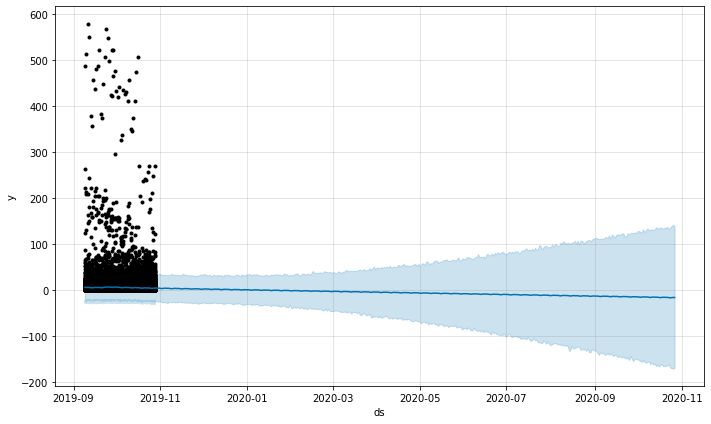

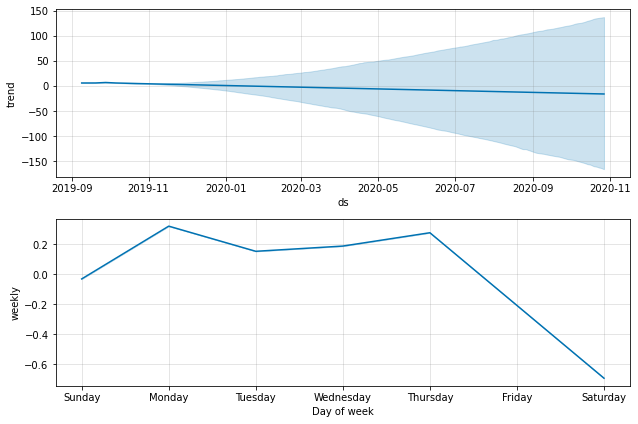

In [235]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)